In [81]:
%matplotlib notebook
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
from matplotlib.image import imread

# Setting up some variables

In [2]:
batch_size = 32
num_classes = 10
epochs = 50
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# Getting the data and splitting it into training and testing sets

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# Vector to matrix

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('y_train_shape:', y_train.shape)
print(y_train[0])

y_train_shape: (50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# What does it look like?

In [19]:
def load_label_names(index):
    if index > 9:
        return None
    
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    
    return labels[index]

<IPython.core.display.Javascript object>


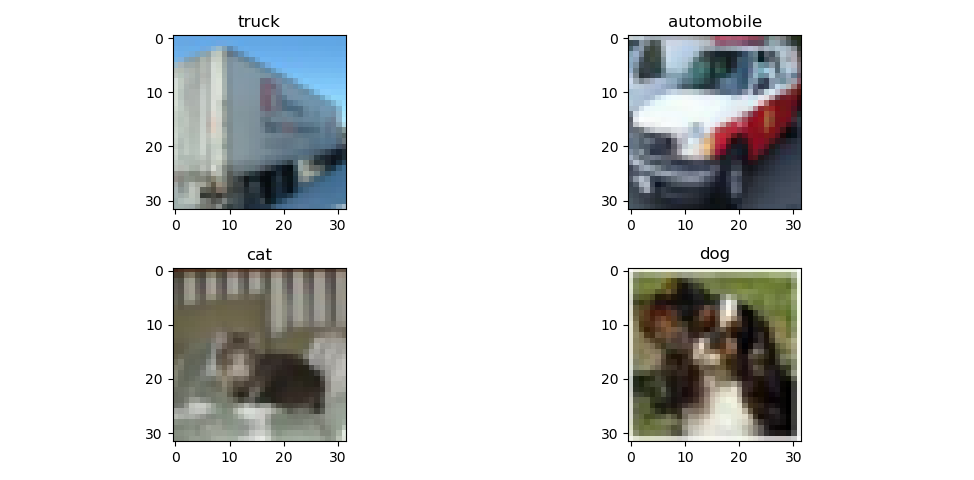

In [18]:
indices = [15, 60, 150, 500]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

title = load_label_names(list(y_train[indices[0]]).index(1))
ax1.imshow(x_train[indices[0]])
ax1.set(title=title)

title = load_label_names(list(y_train[indices[1]]).index(1))
ax2.imshow(x_train[indices[1]])
ax2.set(title=title)

title = load_label_names(list(y_train[indices[2]]).index(1))
ax3.imshow(x_train[indices[2]])
ax3.set(title=title)

title = load_label_names(list(y_train[indices[3]]).index(1))
ax4.imshow(x_train[indices[3]])
ax4.set(title=title)

fig.tight_layout()
plt.show()

# Building the network!

Don't mind the warnings, they're just telling us that TensorFlow is releasing version 2.0 soon

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# "Compile" the network

In [8]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Making them pixels float

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# What we all came here for: training the model!

In [10]:
model.fit(
    x_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 325s 7ms/step - loss: 1.5062 - acc: 0.4515 - val_loss: 1.1423 - val_acc: 0.5915
Epoch 2/50
50000/50000 [==============================] - 281s 6ms/step - loss: 1.1159 - acc: 0.6053 - val_loss: 0.9629 - val_acc: 0.6632
Epoch 3/50
50000/50000 [==============================] - 284s 6ms/step - loss: 0.9625 - acc: 0.6605 - val_loss: 0.8569 - val_acc: 0.6969
Epoch 4/50
50000/50000 [==============================] - 301s 6ms/step - loss: 0.8719 - acc: 0.6932 - val_loss: 0.8189 - val_acc: 0.7198
Epoch 5/50
50000/50000 [==============================] - 278s 6ms/step - loss: 0.8184 - acc: 0.7124 - val_loss: 0.7569 - val_acc: 0.7356
Epoch 6/50
50000/50000 [==============================] - 274s 5ms/step - loss: 0.7674 - acc: 0.7304 - val_loss: 0.7566 - val_acc: 0.7403
Epoch 7/50
50000/50000 [==============================] - 276s 6ms/step - 

# Always make backups

In [11]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\lind0096\Documents\Code\neural_network_showcase\saved_models\keras_cifar10_trained_model.h5 


# And now let's actually test the model

<IPython.core.display.Javascript object>


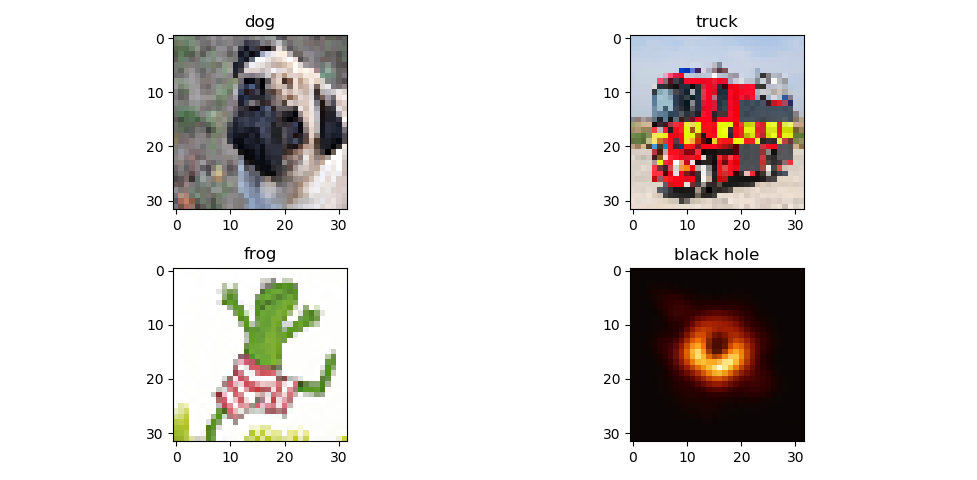

In [77]:
images = ['pug.png', 'firetruck.png', 'kikker.png', 'blackhole.png']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

title = 'dog'
dog = imread(images[0])
ax1.imshow(dog)
ax1.set(title=title)

title = 'truck'
truck = imread(images[1])
ax2.imshow(truck)
ax2.set(title=title)

title = 'frog'
frog = imread(images[2])
ax3.imshow(frog)
ax3.set(title=title)

title = 'black hole'
black_hole = imread(images[3])
ax4.imshow(black_hole)
ax4.set(title=title)

fig.tight_layout()
plt.show()

# The dog

In [60]:
def get_label_name_by_highest_value(prediction_list):
    max_value = np.max(prediction_list)
    max_index = np.nanargmax(prediction_list)
    return max_value, max_index

<IPython.core.display.Javascript object>


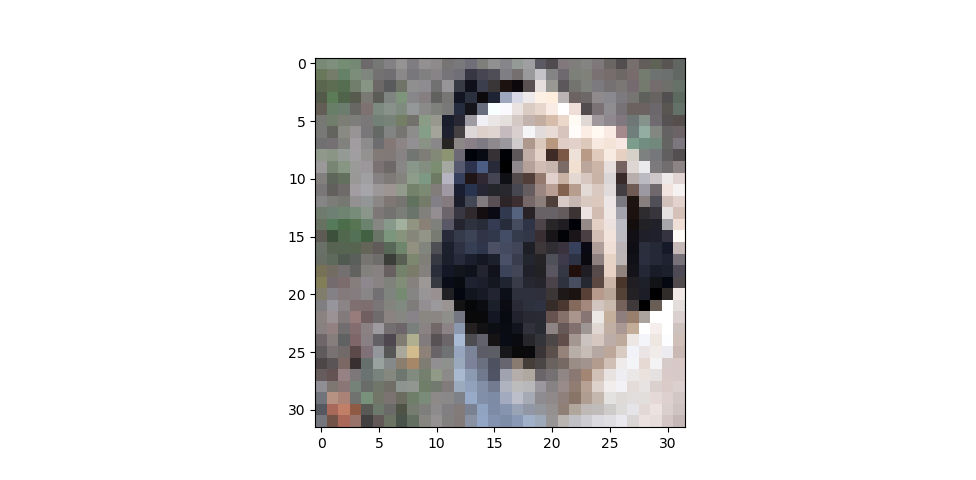

In [75]:
plt.imshow(dog)

In [62]:
dog = np.reshape(dog, (1, 32, 32, 3))
prediction = model.predict(dog, batch_size=1)

max_value, max_index = get_label_name_by_highest_value(prediction)

print('Accuracy:', max_value)
print('Prediction:', load_label_names(max_index))

Accuracy: 0.99853206
Prediction: dog


# The truck

<IPython.core.display.Javascript object>


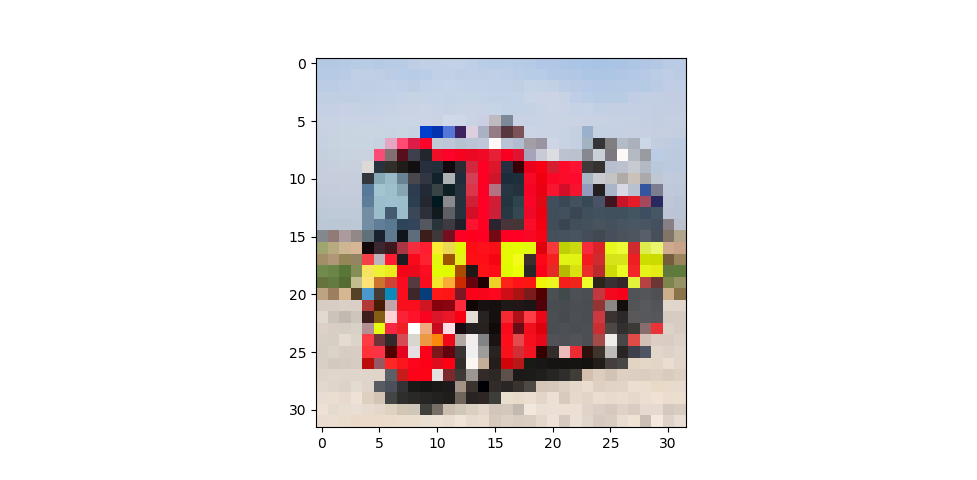

In [78]:
plt.imshow(truck)

In [66]:
truck = np.reshape(truck, (1, 32, 32, 3))
prediction = model.predict(truck, batch_size=1)

max_value, max_index = get_label_name_by_highest_value(prediction)

print('Accuracy:', max_value)
print('Prediction:', load_label_names(max_index))

Accuracy: 0.99999285
Prediction: truck


# The frog

<IPython.core.display.Javascript object>


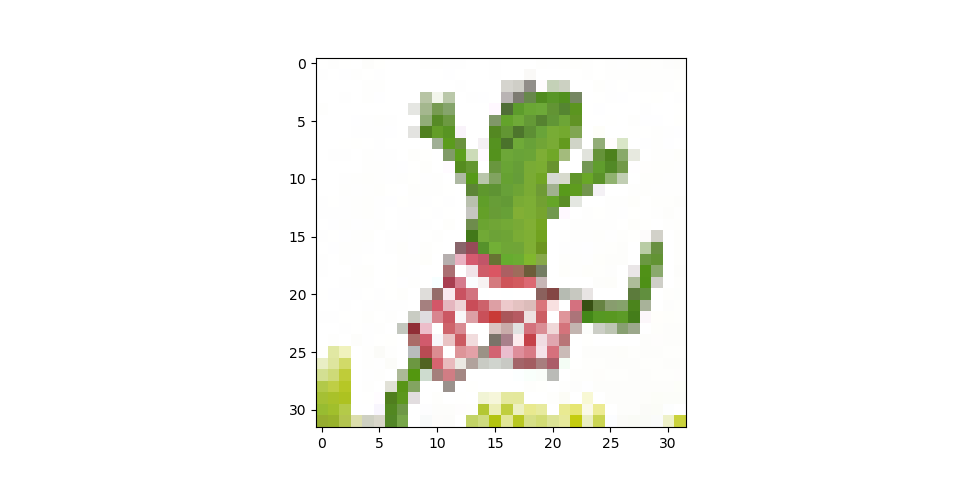

In [79]:
plt.imshow(frog)

In [73]:
frog = np.reshape(frog, (1, 32, 32, 3))
prediction = model.predict(frog, batch_size=1)

max_value, max_index = get_label_name_by_highest_value(prediction)

print('Accuracy:', max_value)
print('Prediction:', load_label_names(max_index))

Accuracy: 0.9007293
Prediction: deer


# The black hole


<IPython.core.display.Javascript object>


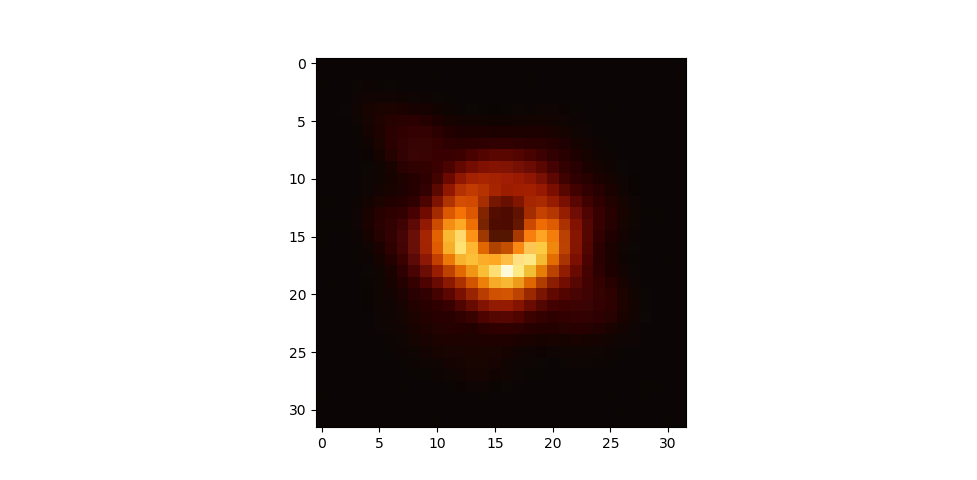

In [80]:
plt.imshow(black_hole)

In [74]:
black_hole = np.reshape(black_hole, (1, 32, 32, 3))
prediction = model.predict(black_hole, batch_size=1)

max_value, max_index = get_label_name_by_highest_value(prediction)

print('Accuracy:', max_value)
print('Prediction:', load_label_names(max_index))

Accuracy: 0.5273267
Prediction: ship
